In [568]:
import pandas as pd
import numpy as np



In [569]:
df = pd.read_csv('penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [570]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [571]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [572]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [573]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [574]:
cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

In [575]:
df[cols] = df[cols].fillna(df[cols].mean())
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE


In [576]:
df.isna().sum()

species               0
island                0
culmen_length_mm      0
culmen_depth_mm       0
flipper_length_mm     0
body_mass_g           0
sex                  10
dtype: int64

In [577]:
# df['sex'] = df['sex'].ffill()
# df.head()

In [578]:
# df['sex'] = df['sex'].replace('MALE',  1)
# df['sex'] = df['sex'].replace('FEMALE',  0)

df['sex'] = df['sex'].replace(['FEMALE','MALE'], [0,1])

df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,1
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,0
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,0
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,0


In [579]:
df['sex'].unique()

array([1, 0, nan, '.'], dtype=object)

In [580]:
df['sex'] = df['sex'].replace('.', np.nan)

C:\Users\vrjav\AppData\Local\Temp\ipykernel_32560\2412779165.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'] = df['sex'].replace('.', np.nan)


In [581]:
df = pd.get_dummies(df, dtype=int)
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
0,39.10000,18.70000,181.000000,3750.000000,1.0,1,0,0,0,0,1
1,39.50000,17.40000,186.000000,3800.000000,0.0,1,0,0,0,0,1
2,40.30000,18.00000,195.000000,3250.000000,0.0,1,0,0,0,0,1
3,43.92193,17.15117,200.915205,4201.754386,NaN,1,0,0,0,0,1
4,36.70000,19.30000,193.000000,3450.000000,0.0,1,0,0,0,0,1


In [582]:
from sklearn.impute import KNNImputer
imp = KNNImputer(n_neighbors=7)
imp.fit(df)
df = pd.DataFrame(imp.transform(df), columns=df.columns)

In [583]:
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
0,39.10000,18.70000,181.000000,3750.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.0
1,39.50000,17.40000,186.000000,3800.000000,0.000000,1.0,0.0,0.0,0.0,0.0,1.0
2,40.30000,18.00000,195.000000,3250.000000,0.000000,1.0,0.0,0.0,0.0,0.0,1.0
3,43.92193,17.15117,200.915205,4201.754386,0.571429,1.0,0.0,0.0,0.0,0.0,1.0
4,36.70000,19.30000,193.000000,3450.000000,0.000000,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
339,43.92193,17.15117,200.915205,4201.754386,0.571429,0.0,0.0,1.0,1.0,0.0,0.0
340,46.80000,14.30000,215.000000,4850.000000,0.000000,0.0,0.0,1.0,1.0,0.0,0.0
341,50.40000,15.70000,222.000000,5750.000000,1.000000,0.0,0.0,1.0,1.0,0.0,0.0
342,45.20000,14.80000,212.000000,5200.000000,0.000000,0.0,0.0,1.0,1.0,0.0,0.0


In [584]:
df['sex'].unique()

array([1.        , 0.        , 0.57142857, 0.14285714, 0.85714286,
       0.28571429])

In [585]:
df['sex'] = df['sex'].apply(lambda s: 1 if s>0.5 else 0)

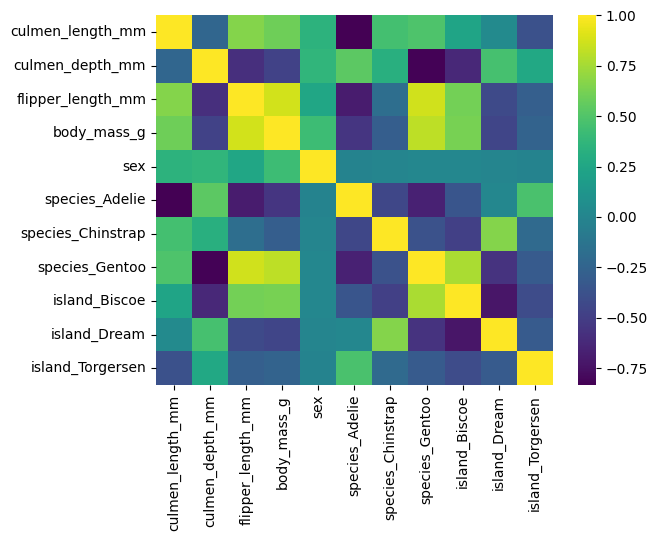

In [586]:
import seaborn as sns
import matplotlib.pyplot as plt 
sns.heatmap(df.corr(), cmap='viridis')
plt.show()

In [587]:
df['sex'].head()

0    1
1    0
2    0
3    1
4    0
Name: sex, dtype: int64

In [588]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


y  = df['sex']
X = df.drop('sex', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(275, 10) (69, 10) (275,) (69,)


In [589]:
# y_train = y_train.ravel()
# y_train[:10]

y_train.unique()

array([0, 1])

In [590]:
lr = LogisticRegression()
lr.fit(X_train, y_train)


c:\Users\vrjav\Downloads\Learning\Machine_Learning\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [591]:
y_pred = lr.predict(X_test)

In [592]:
from sklearn.metrics import accuracy_score, confusion_matrix
acc = accuracy_score(y_pred=y_pred, y_true=y_test)
print(acc, confusion_matrix(y_pred=y_pred, y_true=y_test))

0.8405797101449275 [[23  8]
 [ 3 35]]
